<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/SL%26DA_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [12]:
# Step 1: Load the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(data_url, header=None, names=columns, na_values="?")

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Summary Statistics:

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.4389

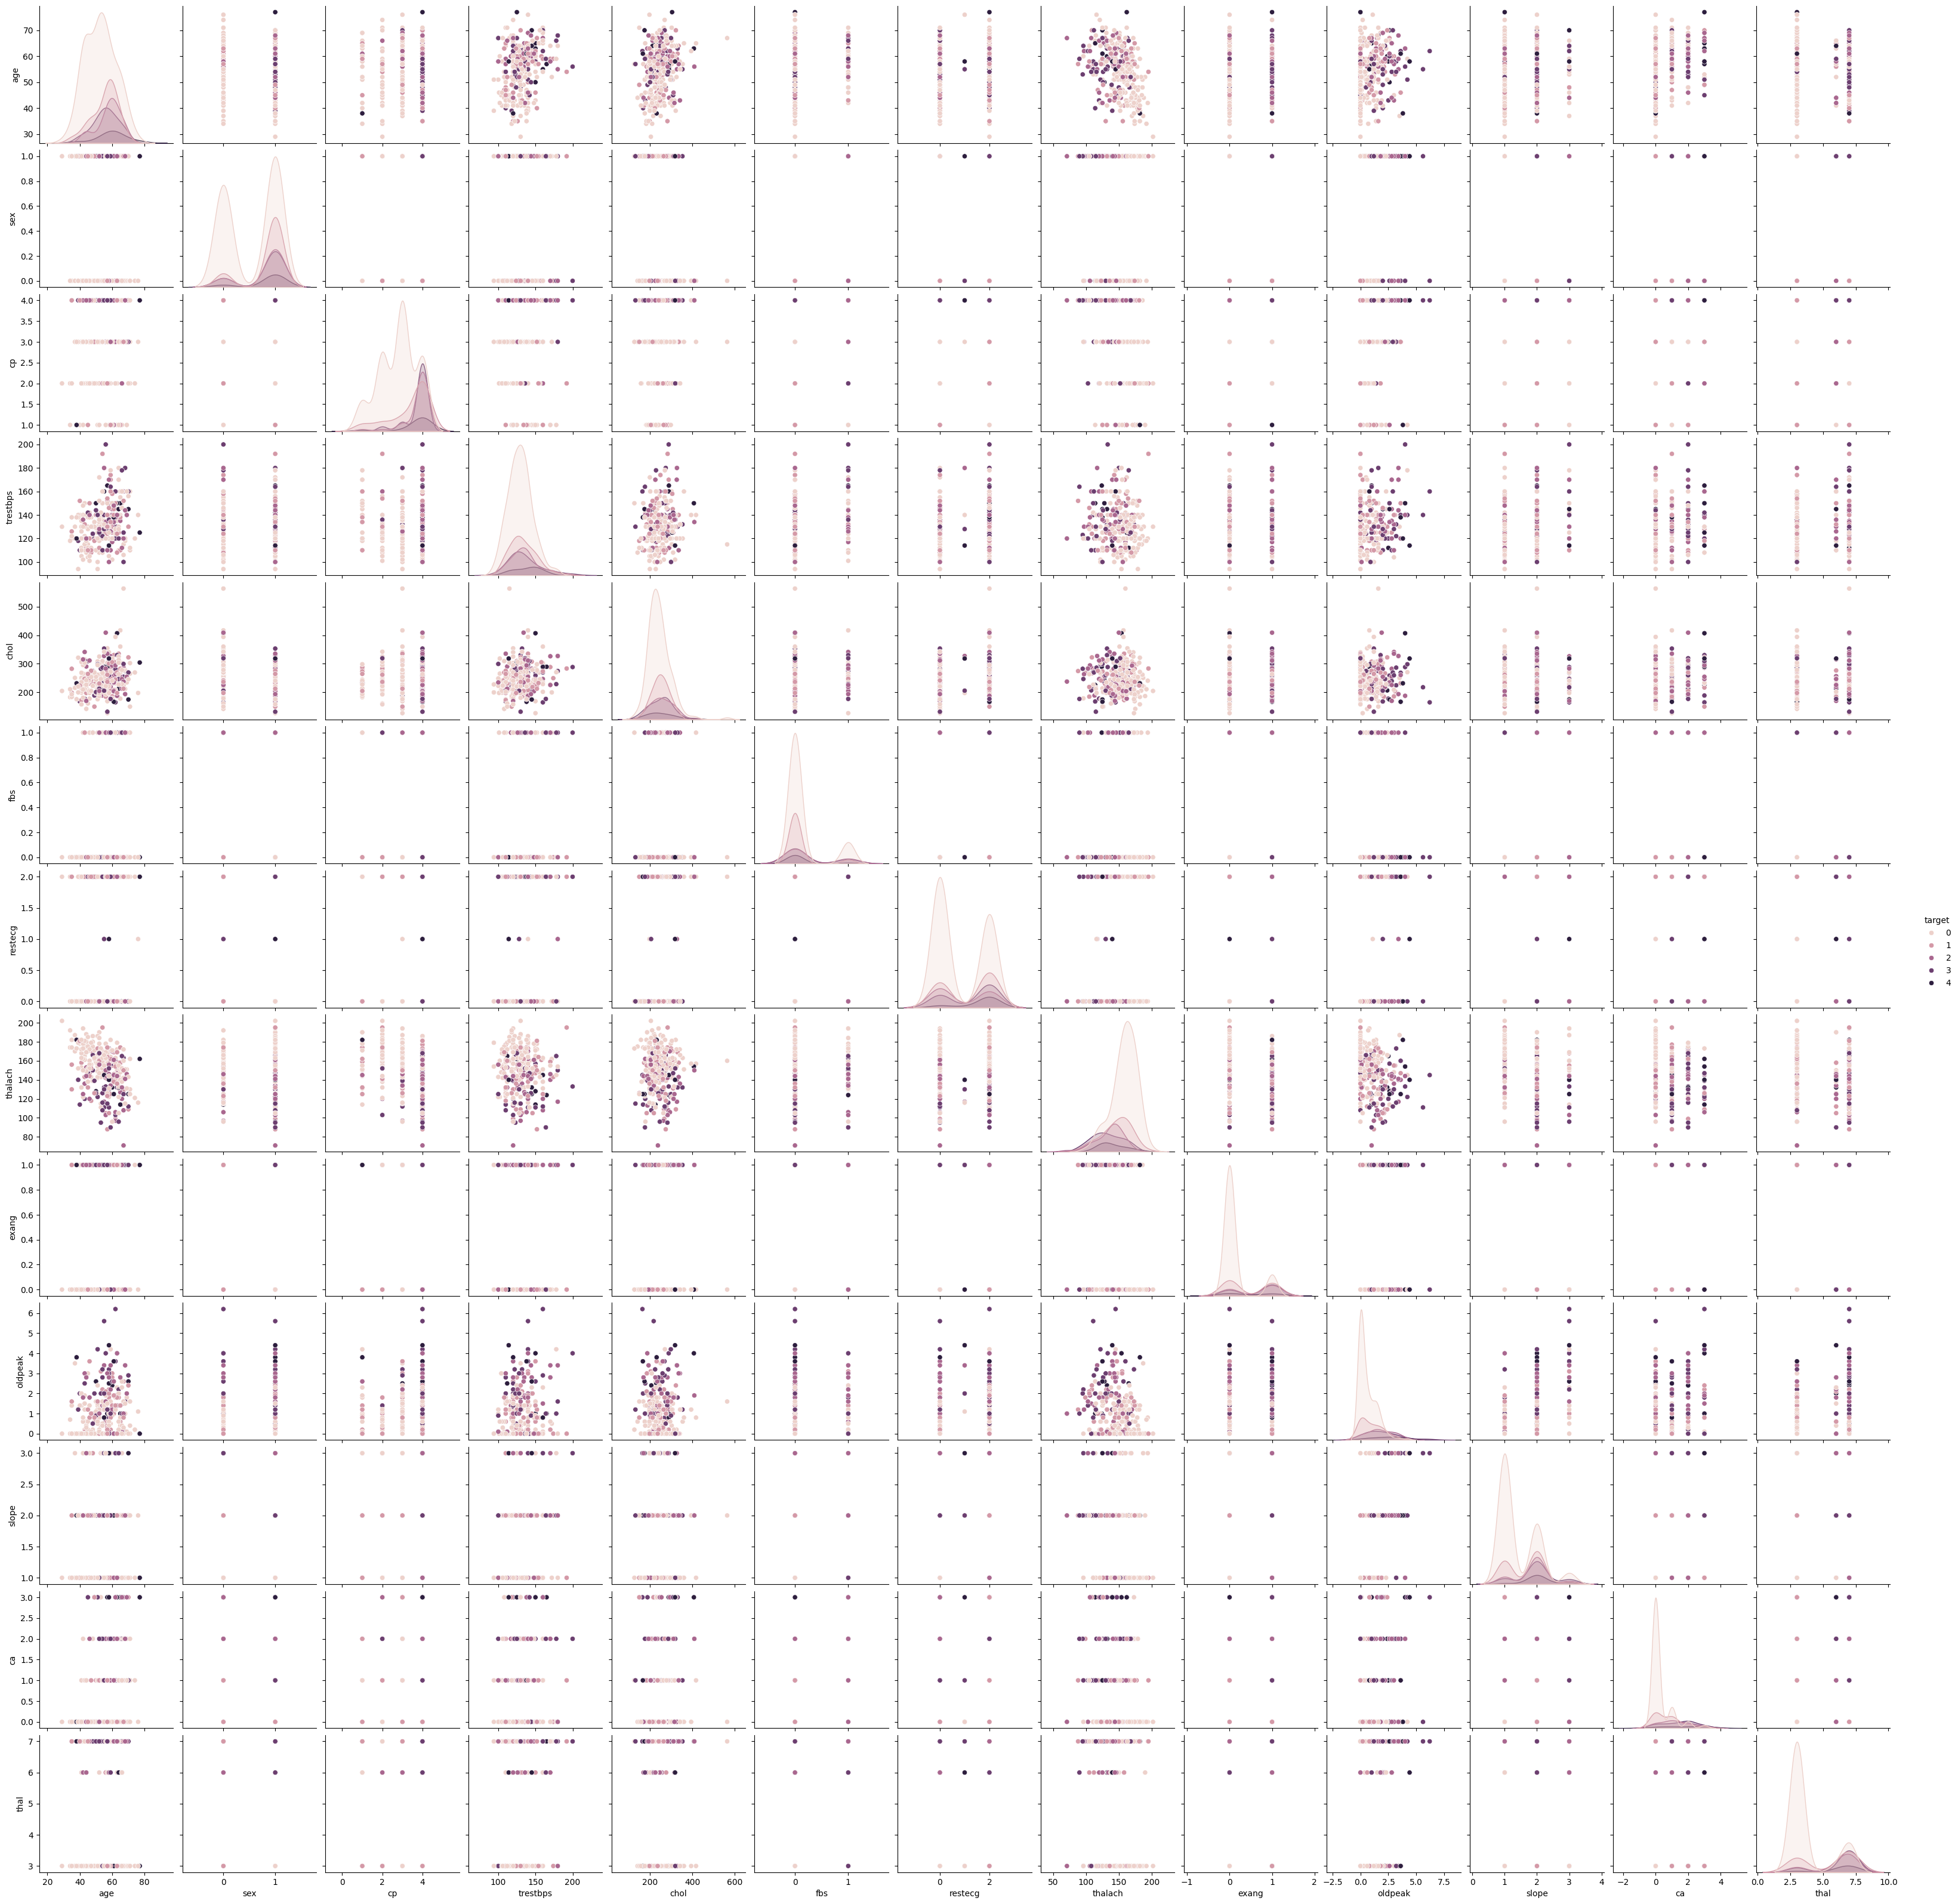

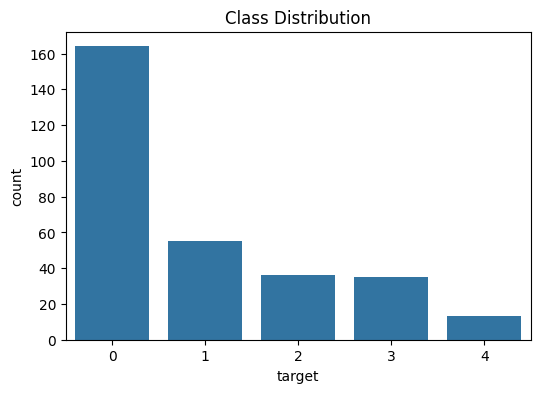

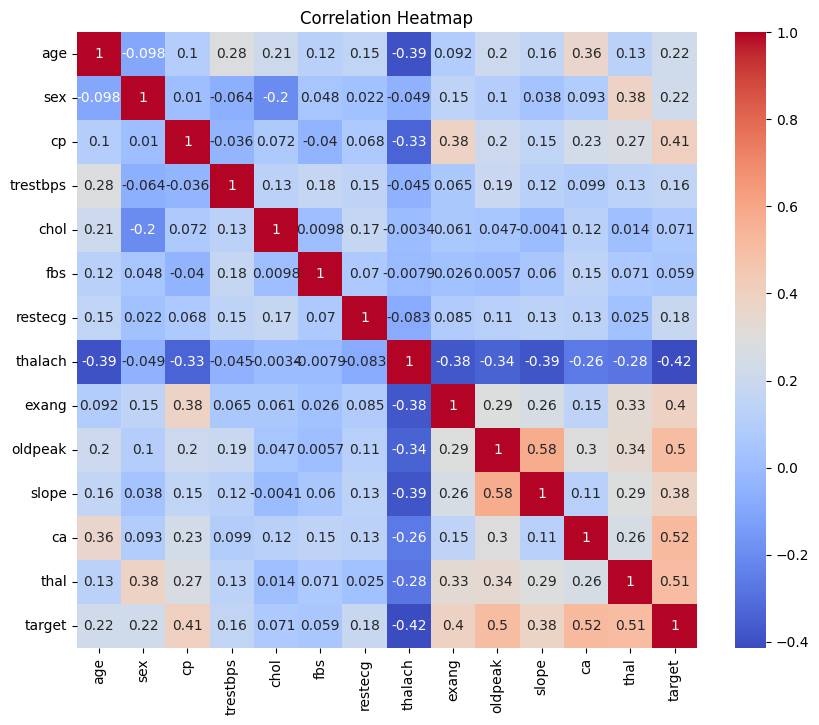

In [13]:
# Step 2: Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("Dataset Info:\n")
    print(df.info())
    print("\nSummary Statistics:\n")
    print(df.describe())

    # Visualizations
    sns.pairplot(df, hue="target", diag_kind="kde")
    plt.show()

    # Class Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x="target", data=df)
    plt.title("Class Distribution")
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

perform_eda(df)


In [14]:
# Step 3: Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

# Encode categorical variables
categorical_features = ["cp", "restecg", "slope", "thal", "ca"]
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

# Handle class imbalance using SMOTE
X = df.drop("target", axis=1)
y = df["target"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [15]:
# Step 4: Model Building and Evaluation
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

# LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

# QDA
qda = QDA()
qda.fit(X_train_scaled, y_train)
y_pred_qda = qda.predict(X_test_scaled)
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        46
           1       0.44      0.30      0.35        57
           2       0.35      0.56      0.43        36
           3       0.46      0.37      0.41        49
           4       0.56      0.62      0.59        52

    accuracy                           0.50       240
   macro avg       0.50      0.51      0.49       240
weighted avg       0.50      0.50      0.49       240

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        46
           1       0.45      0.30      0.36        57
           2       0.36      0.58      0.45        36
           3       0.47      0.37      0.41        49
           4       0.58      0.63      0.61        52

    accuracy                           0.50       240
   macro avg       0.50      0.52      0.50       240
weigh

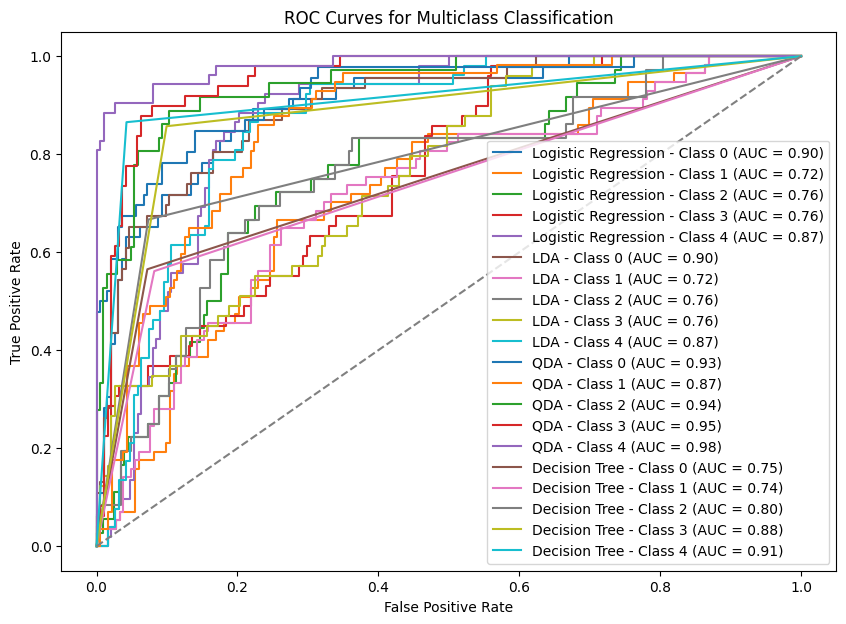

In [16]:
# Step 5: Model Comparison
models = {
    "Logistic Regression": log_reg,
    "LDA": lda,
    "QDA": qda,
    "Decision Tree": tree
}

# Binarize the output for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i, (name, model) in enumerate(models.items()):
    if name == "Decision Tree":
        probas = model.predict_proba(X_test)
    else:
        probas = model.predict_proba(X_test_scaled)

    # Compute ROC curve and AUC for each class
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, class_idx], probas[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} - Class {class_idx} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiclass Classification")
plt.legend()
plt.show()


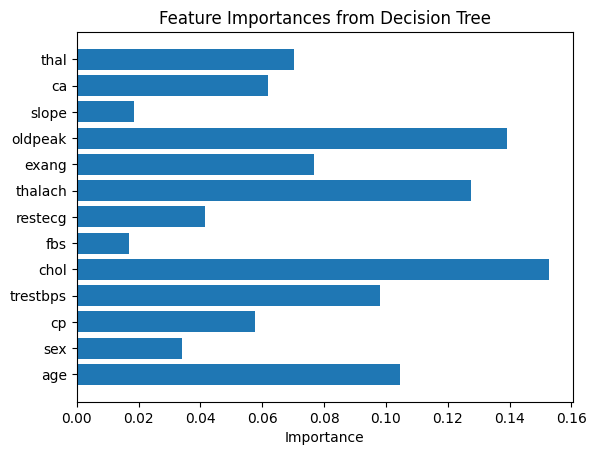

In [17]:
# Step 6: Feature Importance
feature_importances = tree.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importances from Decision Tree")
plt.show()